In [1]:
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)
import plotly.graph_objs as go

from openalea.mtg.algo import split, orders, union

import pandas as pd
from pathlib import Path
import os
from openalea.mtg.io import read_mtg_file, write_mtg
from openalea.strawberry.analysis import extract_at_plant_scale, extract_at_node_scale, extract_at_module_scale
from openalea.strawberry.analysis import df2waffle, plot_waffle, plot_pie

In [2]:
files_names=[]
# START BY LOADING ALL EXISTING MTG FILES IN /dashboard_files
home = str(Path.home())
data_directory = os.path.join(home, "dashboard_files")
file_paths = {}
for file in os.listdir(data_directory):
    if file.endswith(".mtg"):
        file_paths[file] = os.path.join(data_directory, file)
        
    files_names.append(file)
mtg1 = read_mtg_file(file_paths[files_names[0]])
mtg2 = read_mtg_file(file_paths[files_names[2]])
bigmtg = union(mtg1, mtg2)

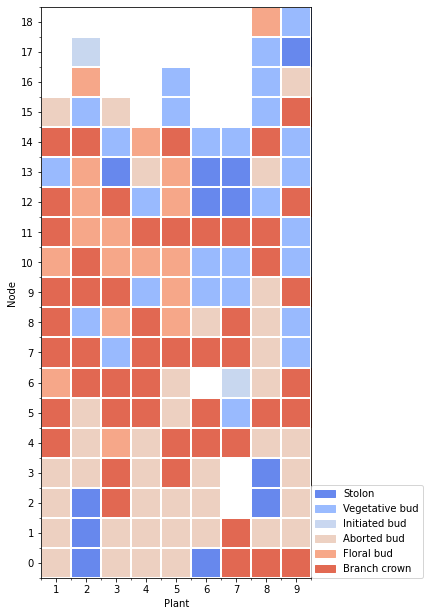

In [3]:
df = extract_at_node_scale(mtg1)
date = df['date']

tmp = df2waffle(df, index='rank', date=date[len(date)-1], variable='branching_type')

l_names = {"1":"Stolon", 
           "2":"Vegetative bud",
           "3":"Initiated bud",
           "4":"Aborted bud",
           "5":"Floral bud",
           "6":"Branch crown"}

yticks_l =list(range(0,len(tmp.index)))
yticks_l.reverse()
layout={
    'xlabel': 'Plant',
    'xticks': range(0,len(tmp.columns)),
    'xticks_label': range(1,len(tmp.columns)+1),
    'ylabel': 'Node',
    'yticks': range(0,len(tmp.index)),
    'yticks_label': yticks_l,
}


fig=plot_waffle(tmp, 
                layout=layout, 
                legend_name=l_names, 
                plot_func='matplotlib')
fig

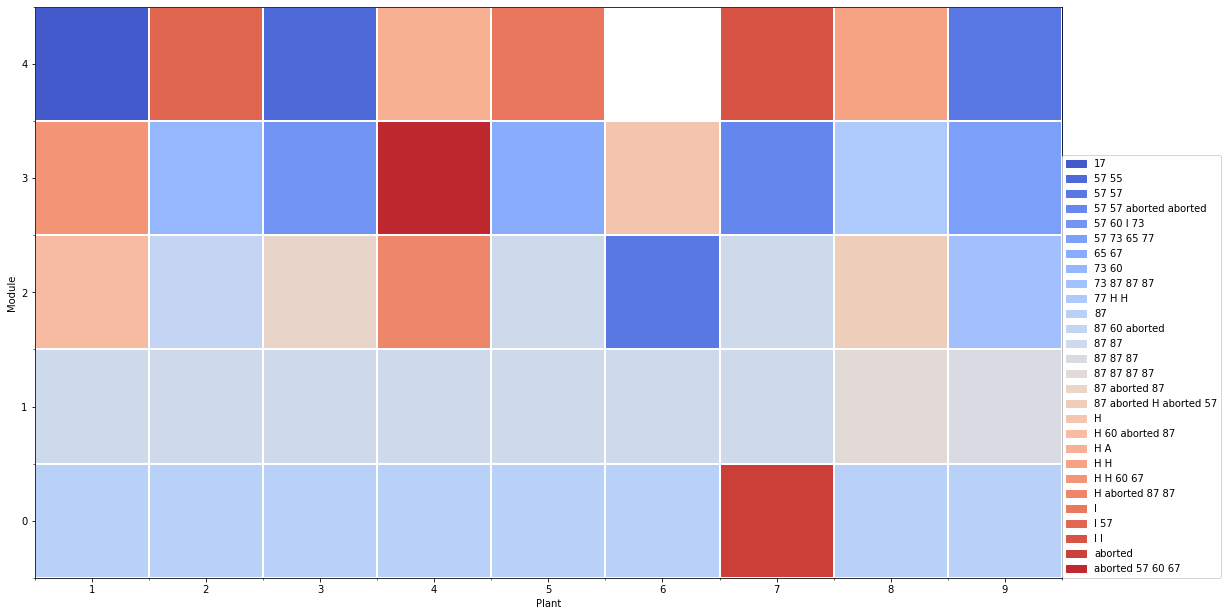

In [4]:
df = extract_at_module_scale(mtg1)

date = df['date']

tmp=df2waffle(df, index='order', 
              date=date[len(date)-1], 
              variable='stage', 
              aggfunc=lambda x: ' '.join(x),
              crosstab=False)
yticks_l =list(range(0,len(tmp.index)))
yticks_l.reverse()

layout={
    'xlabel': 'Plant',
    'xticks': range(0,len(tmp.columns)),
    'xticks_label': tmp.columns,
    'ylabel': 'Module',
    'yticks': range(0,len(tmp.index)),
    'yticks_label': yticks_l,
}


fig = plot_waffle(tmp,
                  layout=layout,
                  plot_func='matplotlib')
# fig

In [5]:
df = extract_at_module_scale(mtg1)
date = df['date']
tmp=df2waffle(df, index='order', 
              date=date[len(date)-1], 
              variable='stage', 
              aggfunc=lambda x: ' '.join(x),
              crosstab=True)

yticks_l =list(range(0,len(tmp.index)))
yticks_l.reverse()

layout={
    'xlabel': 'Stage',
    'xticks': range(0,len(tmp.columns)),
    'xticks_label': tmp.columns,
    'ylabel': 'Module',
    'yticks': range(0,len(tmp.index)),
    'yticks_label': yticks_l,
    'width': 900
}


fig = plot_waffle(tmp,
                  layout=layout,
                  plot_func='plotly.heatmap')
fig.show()

pie_plt = plot_pie(tmp)

pie_plt.show()



In [6]:
tmp

stage,17,55,57,60,65,67,73,77,87,A,H,I,aborted
order,,,,,,,,,,,,,
4,7.14,7.14,28.57,0.00,0.00,0.00,0.00,0.00,0.00,7.14,21.43,28.57,0.00
3,0.00,0.00,17.86,14.29,7.14,10.71,10.71,7.14,0.00,0.00,17.86,3.57,10.71
2,0.00,0.00,10.34,6.90,0.00,0.00,3.45,0.00,48.28,0.00,10.34,0.00,20.69
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.89,0.00,0.00,0.00,11.11


In [47]:
extract_at_module_scale(mtg1)

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,...,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,stage,vid,plant_vid
0,Clery,2014/12/10,A,1,0,11,2,13,0,0,...,1,0,8,3,1,3,False,H,2,1
1,Clery,2014/12/10,A,2,0,11,3,14,0,0,...,5,2,4,3,1,3,False,H,102,101
2,Clery,2014/12/10,A,3,0,8,2,10,0,0,...,3,0,5,2,1,3,False,H,189,188
3,Clery,2014/12/10,A,4,0,4,0,4,0,0,...,0,0,0,3,1,4,True,cut,255,254
4,Clery,2014/12/10,A,4,1,2,2,4,0,0,...,0,0,4,0,2,3,False,H,266,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Clery,2015/05/27,A,9,3,3,0,3,3,0,...,1,0,1,1,2,4,True,65,5553,5453
259,Clery,2015/05/27,A,9,1,3,0,3,8,0,...,2,0,0,0,2,4,True,87,5575,5453
260,Clery,2015/05/27,A,9,2,3,0,3,4,0,...,2,0,0,0,2,4,True,87,5583,5453
261,Clery,2015/05/27,A,9,3,3,0,3,4,0,...,2,0,0,0,2,4,True,77,5591,5453


In [7]:
df = extract_at_plant_scale(bigmtg)
# df['date']=pd.to_datetime(df['date'])

In [16]:
# res = df[['Genotype', 'date', 'nb_total_leaves']]
res = df.sort_values('date').reset_index(drop=True)

import plotly.express as px

fig = px.line(res, x='date', y='nb_total_leaves',)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    xaxis = dict(
        type="category",
        tickmode = 'array',
#         tickvals = res["date"].tolist(),
#         ticktext = res["date"].tolist()
    )
)
fig.show()


<AxesSubplot:xlabel='date'>

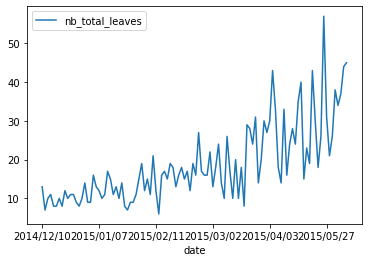

In [9]:
# res=
res.plot(x='date', y='nb_total_leaves')

In [148]:
res

,Genotype,date,modality,plant,nb_total_leaves,nb_total_flowers,nb_stolons,nb_visible_leaves,nb_missing_leaves,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_inflorescence,leaf_area,order_max,nb_ramifications,vid
0,Clery,2014/12/10,A,1,13,0,3,11,0,1,0,8,0,54.44,0,0,1
1,Darselect,2014/12/10,A,3,7,0,0,6,0,3,0,3,1,46.25,1,0,5696
2,Darselect,2014/12/10,A,4,10,0,1,7,0,6,0,3,0,36.81,0,0,5748
3,Darselect,2014/12/10,A,9,11,0,3,10,0,4,0,2,1,46.25,1,0,5968
4,Darselect,2014/12/10,A,5,8,0,0,6,0,4,0,2,1,47.19,1,0,5809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Clery,2015/05/27,A,4,38,43,1,34,0,8,3,4,11,147.62,4,4,4818
104,Clery,2015/05/27,A,3,34,62,2,34,0,8,0,9,12,82.89,4,3,4670
105,Clery,2015/05/27,A,2,37,50,4,37,0,9,1,8,10,179.52,4,3,4516
106,Clery,2015/05/27,A,1,44,40,8,38,0,7,1,5,8,132.39,4,6,4358


In [149]:
fig = go.FigureWidget()
x='date'
y="nb_total_leaves"

res = df.sort_values('date').reset_index(drop=True)

genotypes = df['Genotype'].unique()
for genotype in genotypes:
    df_geno = res.loc[res['Genotype']==genotype]
    fig.add_scatter(x=df_geno[x], 
                    y=df_geno[y],
                    name=genotype
                    )

fig

FigureWidget({
    'data': [{'name': 'Clery',
              'type': 'scatter',
              'uid': '76dec513-…

In [11]:
# genotypes = df['Genotype'].unique()

# if len(genotypes) > 1:
    
    
df.iplot(kind = "lines", 
              mode='lines+markers',
              x='date',
              y="nb_total_leaves",
#               asFigure=True,
             )

In [42]:
res

,plant,nb_total_leaves,nb_total_flowers,nb_stolons,nb_visible_leaves,nb_missing_leaves,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_inflorescence,leaf_area,order_max,nb_ramifications,vid
date,,,,,,,,,,,,,,
2014/12/10,5.0,10.888889,0.000000,2.555556,8.555556,0.0,2.888889,0.333333,4.777778,0.222222,68.032222,0.222222,0.000000,311.888889
2015/01/07,5.0,13.111111,7.555556,1.555556,11.111111,0.0,3.444444,1.111111,4.444444,1.000000,40.495556,0.777778,0.777778,996.333333
2015/02/15,5.0,16.333333,18.555556,2.444444,16.111111,0.0,2.555556,0.777778,7.111111,2.777778,66.601111,1.000000,1.333333,1764.666667
2015/03/02,5.0,18.777778,26.222222,1.555556,17.222222,0.0,3.444444,0.888889,8.000000,3.333333,89.987778,1.555556,1.444444,2677.222222
2015/04/03,5.0,27.333333,36.777778,1.222222,24.222222,0.0,7.555556,1.888889,7.111111,5.222222,80.016667,2.444444,2.111111,3744.555556
2015/05/27,5.0,37.000000,47.666667,4.000000,34.666667,0.0,8.555556,1.222222,4.666667,9.888889,140.605556,3.888889,3.222222,4915.888889


In [12]:
res = df.groupby('Genotype').mean()

x='nb_stolons'
y="nb_total_leaves"

p=res.iplot(kind = "lines", 
              mode='lines+markers',
              x=x,
              y=y,
              xTitle=x,
              yTitle=y,
              asFigure=True,
             )
p

In [175]:
df

,Genotype,date,modality,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,...,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,stage,vid,plant_vid
0,Clery,2014/12/10,A,1,0,11,2,13,0,0,...,1,0,8,3,1,3,False,H,2,1
1,Clery,2014/12/10,A,2,0,11,3,14,0,0,...,5,2,4,3,1,3,False,H,102,101
2,Clery,2014/12/10,A,3,0,8,2,10,0,0,...,3,0,5,2,1,3,False,H,189,188
3,Clery,2014/12/10,A,4,0,4,0,4,0,0,...,0,0,0,3,1,4,True,cut,255,254
4,Clery,2014/12/10,A,4,1,2,2,4,0,0,...,0,0,4,0,2,3,False,H,266,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Darselect,2015/05/20,A,8,3,2,0,2,1,0,...,1,0,1,0,2,4,True,60,9615,9534
505,Darselect,2015/05/20,A,9,0,7,0,7,17,0,...,0,0,0,0,1,4,True,87,9637,9636
506,Darselect,2015/05/20,A,9,1,3,0,3,5,0,...,0,1,0,0,2,4,True,87,9657,9636
507,Darselect,2015/05/20,A,9,2,4,0,4,0,0,...,1,1,2,0,3,4,True,I,9665,9636


In [177]:
df=extract_at_module_scale(bigmtg)
    
tmp=df2waffle(df, index='order', 
          date='2015/05/20', 
          variable='stage', 
          crosstab=True)
    
#     try:
#         fig = plot_pie(tmp)
#         fig.update_layout(title="Percentage representation of each stage at one date")
#         transfert_figure_pie(fig,p3_pie)
#     except ValueError:
#         pass

In [178]:
tmp

stage,17,57,58,60,65,67,73,77,81,82,87,87 morte,G,H,I,aborted
order,,,,,,,,,,,,,,,,
5,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,100.00,0.00
4,12.5,0.00,25.0,0.00,12.50,0.00,0.00,12.50,0.00,0.00,0.00,0.00,12.5,0.00,25.00,0.00
3,0.0,0.00,0.0,5.56,11.11,5.56,16.67,0.00,11.11,0.00,16.67,0.00,0.0,11.11,11.11,11.11
2,0.0,4.17,0.0,0.00,4.17,0.00,4.17,8.33,0.00,4.17,50.00,0.00,0.0,4.17,8.33,12.50
1,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.00,0.00,0.00
0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.89,11.11,0.0,0.00,0.00,0.00


In [5]:
df = extract_at_plant_scale(mtg1)
df

,Genotype,date,modality,plant,nb_total_leaves,nb_total_flowers,nb_stolons,nb_visible_leaves,nb_missing_leaves,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_inflorescence,leaf_area,order_max,nb_ramifications,vid
0,Clery,2014/12/10,A,1,13,0,3,11,0,1,0,8,0,54.44,0,0,1
1,Clery,2014/12/10,A,2,14,0,3,11,0,5,2,4,0,57.66,0,0,101
2,Clery,2014/12/10,A,3,10,0,2,8,0,3,0,5,0,55.52,0,0,188
3,Clery,2014/12/10,A,4,8,0,3,6,0,0,0,4,1,50.24,1,0,254
4,Clery,2014/12/10,A,5,9,0,1,7,0,3,0,5,0,55.52,0,0,295
5,Clery,2014/12/10,A,6,11,0,3,9,0,2,0,6,0,87.03,0,0,383
6,Clery,2014/12/10,A,7,11,0,2,8,0,3,1,5,0,92.52,0,0,450
7,Clery,2014/12/10,A,8,10,0,2,7,0,5,0,2,1,59.87,1,0,536
8,Clery,2014/12/10,A,9,12,0,4,10,0,4,0,4,0,99.49,0,0,599
9,Clery,2015/01/07,A,1,11,9,2,11,0,0,4,5,1,56.59,0,0,676


In [17]:
n = df.groupby('date').mean()
n

,plant,order,nb_visible_leaves,nb_foliar_primordia,nb_total_leaves,nb_open_flowers,nb_aborted_flowers,nb_total_flowers,nb_vegetative_bud,nb_initiated_bud,nb_floral_bud,nb_stolons,type_of_crown,crown_status,complete_module,vid,plant_vid
date,,,,,,,,,,,,,,,,,
2014/12/10,5.181818,0.181818,7.000000,1.909091,8.909091,0.000000,0.0,0.000000,2.363636,0.272727,3.909091,2.090909,1.181818,3.181818,0.181818,331.818182,327.000000
2015/01/07,5.210526,0.526316,5.263158,0.947368,6.210526,0.000000,0.0,3.578947,1.631579,0.526316,2.105263,0.736842,1.894737,3.473684,0.473684,1024.157895,1014.842105
2015/02/15,5.241379,0.689655,5.000000,0.068966,5.068966,0.310345,0.0,5.758621,0.793103,0.241379,2.206897,0.758621,2.103448,3.862069,0.862069,1820.344828,1786.310345
2015/03/02,4.921053,1.000000,4.078947,0.368421,4.447368,1.578947,0.0,6.210526,0.815789,0.210526,1.894737,0.368421,2.105263,3.789474,0.789474,2707.921053,2667.736842
2015/04/03,4.784615,1.430769,3.353846,0.430769,3.784615,3.600000,0.0,5.092308,1.046154,0.261538,0.984615,0.169231,2.153846,3.723077,0.723077,3766.184615,3713.323077
2015/05/27,5.138614,2.168317,3.089109,0.207921,3.297030,3.049505,0.0,4.247525,0.762376,0.108911,0.415842,0.356436,2.198020,3.841584,0.871287,4992.396040,4930.811881


In [13]:
n.iplot(y='order_max')

In [6]:
import matplotlib.pyplot as plt
plt.plot(x=n.index, y=n['order_max'])

NameError: name 'n' is not defined

In [11]:
from itertools import chain
from openalea.mtg import stat, algo, traversal


In [44]:
def apparent_axis(g, vid):
    """
    Return apparent axis if module are visible
    """
    visibles = g.property('visible')
    v = vid
    while v is not None:
        yield v
        vtx = v; v = None
        for vid in g.children(vtx):
            if (vid in visibles) and (not is_axis_root(g, vid)):
                v = vid
                
def is_axis_root(g, vid):
    cid = next(g.component_roots_iter(vid))
    pid = g.parent(cid)
    sid = g.Successor(pid)
    if g.label(sid) not in ('bt', 'ht', 'HT'):
        return True
    else:
        return False
    
def module_tree(v, g):
#     _complete = g.property('complete')
#     if not complete:
#         complete_module(g)
#         _complete = g.property('complete')
    
    for cid in g.Sons(v, EdgeType='+'):
        cpx = g.complex(cid)
        visibles = g.property('visible')
#         if DEBUG:
#             if cpx in visibles and (is_axis_root(g, cpx)):
#                 return [m for m in traversal.pre_order2(g, cpx) if m in visibles]
#         else:
        bt = branching_type(cid,g)
        if bt == 6:
            return [m for m in traversal.pre_order2(g, cpx) if m in visibles]


In [20]:
def stage(vid, g):
    stage = g.property('Stade')
    return next(iter(list(stage[cid] for cid in g.components(vid) if cid in stage)), None)


In [14]:
g=mtg1
vids = g.vertices(scale=1)
roots = [rid for pid in vids for rid in g.component_roots_at_scale(pid, scale=2)]

trunks = [ list(chain(*[(v for v in algo.axis(g,m, scale=3) if g.label(v) in ('F', 'f')) 
                        for m in apparent_axis(g, r)])) for r in roots]


In [30]:
t = trunks[0]

for i, vid in enumerate(t):
    print(vid)

3
6
12
13
19
22
37
40
57
67
73
80
90


In [39]:
g.components(2)

[3, 6, 12, 13, 19, 22, 37, 40, 57, 67, 73, 80, 90, 100]

In [41]:
stage = g.property('Stade')
stage

{11: '17',
 18: 'F',
 26: '17',
 29: '17',
 35: 'A',
 36: 'F',
 44: '17',
 47: '17',
 52: '19',
 55: '17',
 56: 'E',
 65: '19',
 66: 'D',
 72: 'A',
 79: 'A',
 85: '17',
 88: '17',
 89: 'F',
 95: '17',
 98: '17',
 99: 'F',
 100: 'H',
 108: '17',
 111: '17',
 116: '17',
 119: '17',
 122: '17',
 125: '17',
 128: '17',
 129: 'G',
 140: 'A',
 146: '17',
 152: '17',
 157: 'A',
 162: '17',
 168: '19',
 175: '17',
 176: 'E',
 182: '17',
 185: '17',
 186: 'C',
 187: 'H',
 201: 'A',
 209: '17',
 211: 'D',
 216: '17',
 222: '19',
 229: '17',
 235: '17',
 242: 'G',
 248: '17',
 251: '17',
 252: 'F',
 253: 'H',
 271: '19',
 276: 'A',
 282: '19',
 291: '19',
 292: 'E',
 293: 'H',
 294: 'cut',
 303: '17',
 306: '17',
 307: 'E',
 315: '17',
 318: '17',
 319: 'F',
 324: '17',
 327: '17',
 330: '17',
 333: '17',
 336: '17',
 337: 'F',
 343: '17',
 348: '19',
 354: '17',
 359: '17',
 362: '17',
 365: '17',
 366: 'E',
 375: '19',
 380: 'A',
 381: 'D',
 382: 'H',
 393: 'F',
 405: 'C',
 410: '17',
 416: 'A'

In [48]:
next(iter(list(stage[cid] for cid in module_tree(vid,g) if cid in stage)), None)


TypeError: 'NoneType' object is not iterable

In [50]:
module_tree(t[0],g)

In [46]:

def my_bt(vid, g):
    """
    Return branching type on parent if branch crown correspond to Son vertex
    """
    for cid in g.Sons(vid, EdgeType='+'):
        return str(branching_type(cid,g))


def complete(vid, g):
    """
    Add property complete or not on mtg
    """
    return g.property("complete").get(vid, False)

    
def my_complete(vid, g):
    """
    Return complete module, incomplete module or other (if not branch crown)
    """
    # scale = 2
    _complete = g.property('complete')
    if not complete:
        complete_module(g)
        _complete = g.property('complete')
        # print(_complete)
    
    res = 'other'
    for cid in g.Sons(vid, EdgeType='+'):
        cpx = g.complex(cid)
        bt = branching_type(cid,g)
        if bt == 6: 
            res = 'complete' if complete(cpx,g) else 'incomplete'
            break
    return res

def apparent_axis(g, vid):
    """
    Return apparent axis if module are visible
    """
    visibles = g.property('visible')
    v = vid
    while v is not None:
        yield v
        vtx = v; v = None
        for vid in g.children(vtx):
            if (vid in visibles) and (not is_axis_root(g, vid)):
                v = vid


def is_axis_root(g, vid):
    cid = next(g.component_roots_iter(vid))
    pid = g.parent(cid)
    sid = g.Successor(pid)
    if g.label(sid) not in ('bt', 'ht', 'HT'):
        return True
    else:
        return False

def branching_type(vid, g):
    """ Returns the type of branching
    
    :Algorithms:
    
    if module is visible:
        - branch crown (complex ramification):6
        - inflorescence : 7

    if module is invisible:
        - stolon (s): 1,
        - vegetative bud(bt, at stage None, 17,18,19):2,
        - initiated bud, (bt, at stage A):3,
        - aborted or roten or dried bud: 4
        - floral bud(ht):5

     
    """

    cpx = g.complex(vid)
    nid = g.node(cpx) 
    if nid.visible:
        if g.label(vid) == 'HT':
            return 7
        else:
            return 6
    
    # select s, ht, et bt
    for cid in nid.components():
        label = cid.label
        if label in ('s', 'ht', 'bt'):
            if label == 's':
                return 1
            elif label == 'bt':
                stage = cid.Stade
                if stage in (None, '17', '18', '19'):
                    return 2
                elif stage == 'A':
                    return 3
                elif stage in ('pourri', 'aborted', 'dried'):
                    return 4
            elif label  == 'ht':
                return 5
    else:
        return -1
        print(('ERROR: ', cpx, nid.complex().Genotype, nid.properties()))
